In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import brute
from VectorBacktester import GeneralBacktester
import ta
import yfinance as yf


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pyfolio as pf

In [3]:
print(81/7)

11.571428571428571


In [4]:
smabt = GeneralBacktester('BTC-USD','2013-08-1', '2023-05-01', window1=21, window2=20*7, strategy='EMA', tcost=0.001)
strategy_results = smabt.run_strategy()
print("Date Range:",smabt.data.index[0], smabt.data.index[-1],"\n")
print(f'Gross Strategy {smabt.strategy} Performance with initial parameters (wind1={smabt.window1}, wind2={smabt.window2}): {strategy_results[0]*100}%')
print(f'Out-/Underperformance with initial parameters (wind1={smabt.window1}, wind2={smabt.window2}): {strategy_results[1]*100}%\n')
print(f'Asset Performance:', smabt.results['creturns'][-1]*100,"%")


[*********************100%***********************]  1 of 1 completed
Date Range: 2014-09-17 00:00:00 2023-04-30 00:00:00 

Gross Strategy EMA Performance with initial parameters (wind1=21, wind2=140): 24299.0%
Out-/Underperformance with initial parameters (wind1=21, wind2=140): 17403.0%

Asset Performance: 6895.86430879958 %


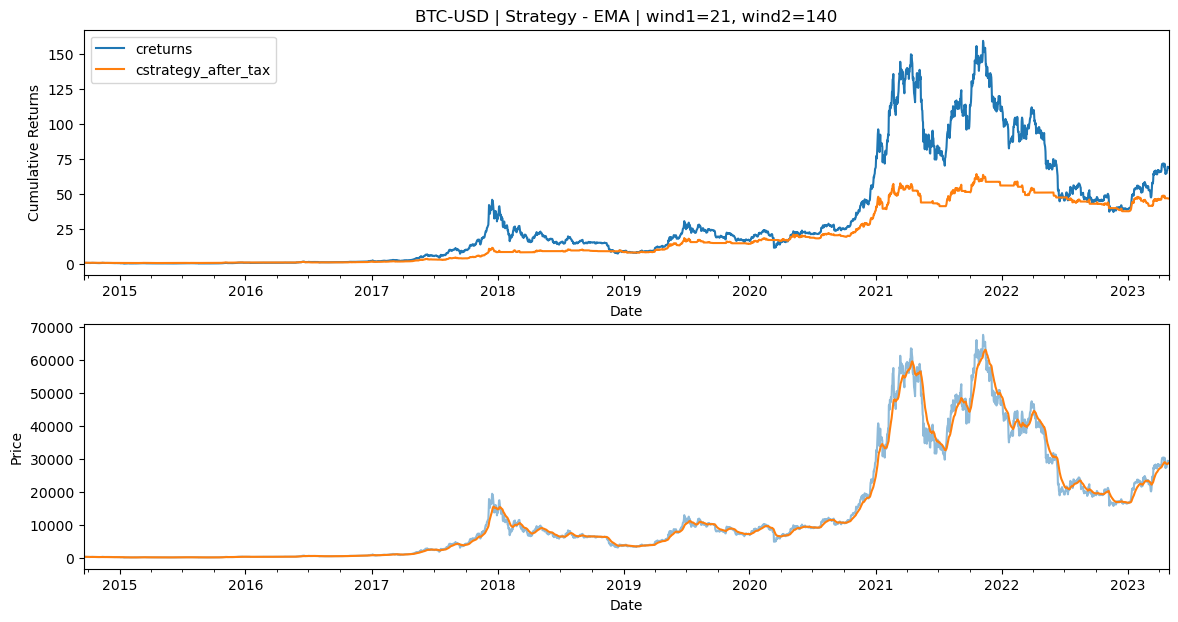

In [5]:
smabt.plot_results(after_tax=False)

In [6]:
print(smabt.window1, smabt.window2)

21 140


Start date,2014-09-19
End date,2023-04-30
Total months,149
,Backtest
Annual return,42.843%
Cumulative returns,8475.797%
Annual volatility,40.885%
Sharpe ratio,1.08
Calmar ratio,0.77
Stability,0.93
Max drawdown,-55.854%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.85,2021-10-20,2023-01-05,NaT,NaN
1,45.72,2017-12-16,2019-02-14,2019-05-11,365
2,40.10,2021-02-21,2021-07-05,2021-10-15,170
3,36.48,2014-11-12,2015-05-30,2015-11-02,254
4,36.20,2016-06-16,2016-09-28,2016-12-28,140


Stress Events,mean,min,max
Oct14,-0.17%,-6.68%,3.09%
Fall2015,-0.09%,-2.26%,1.56%
New Normal,0.17%,-15.18%,22.51%


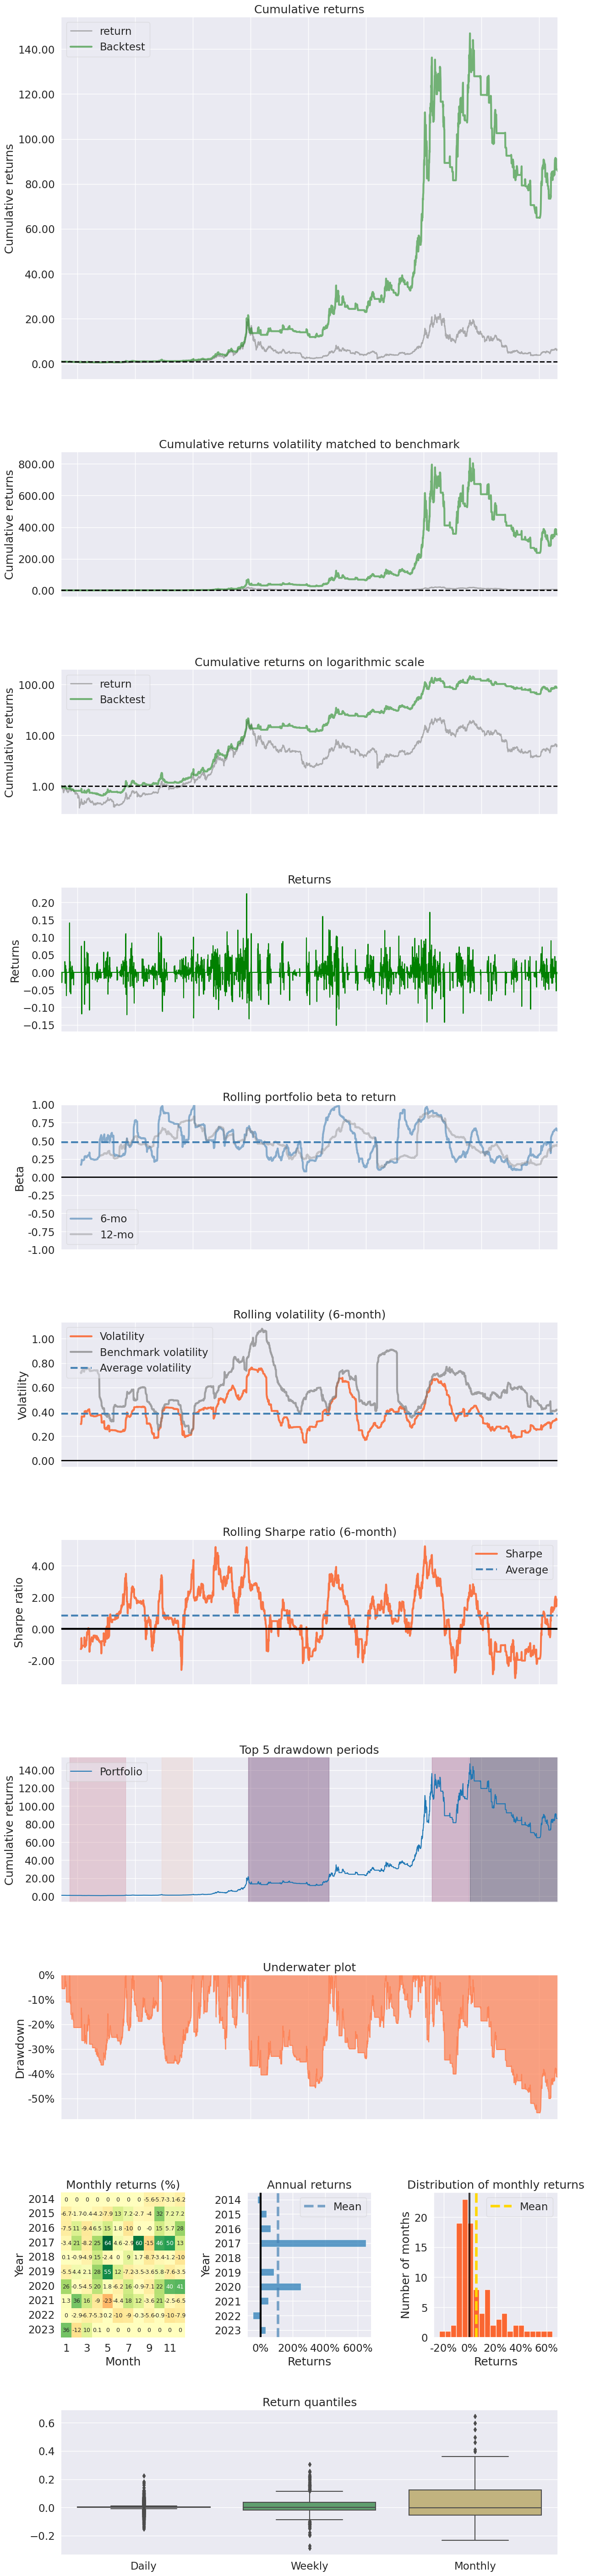

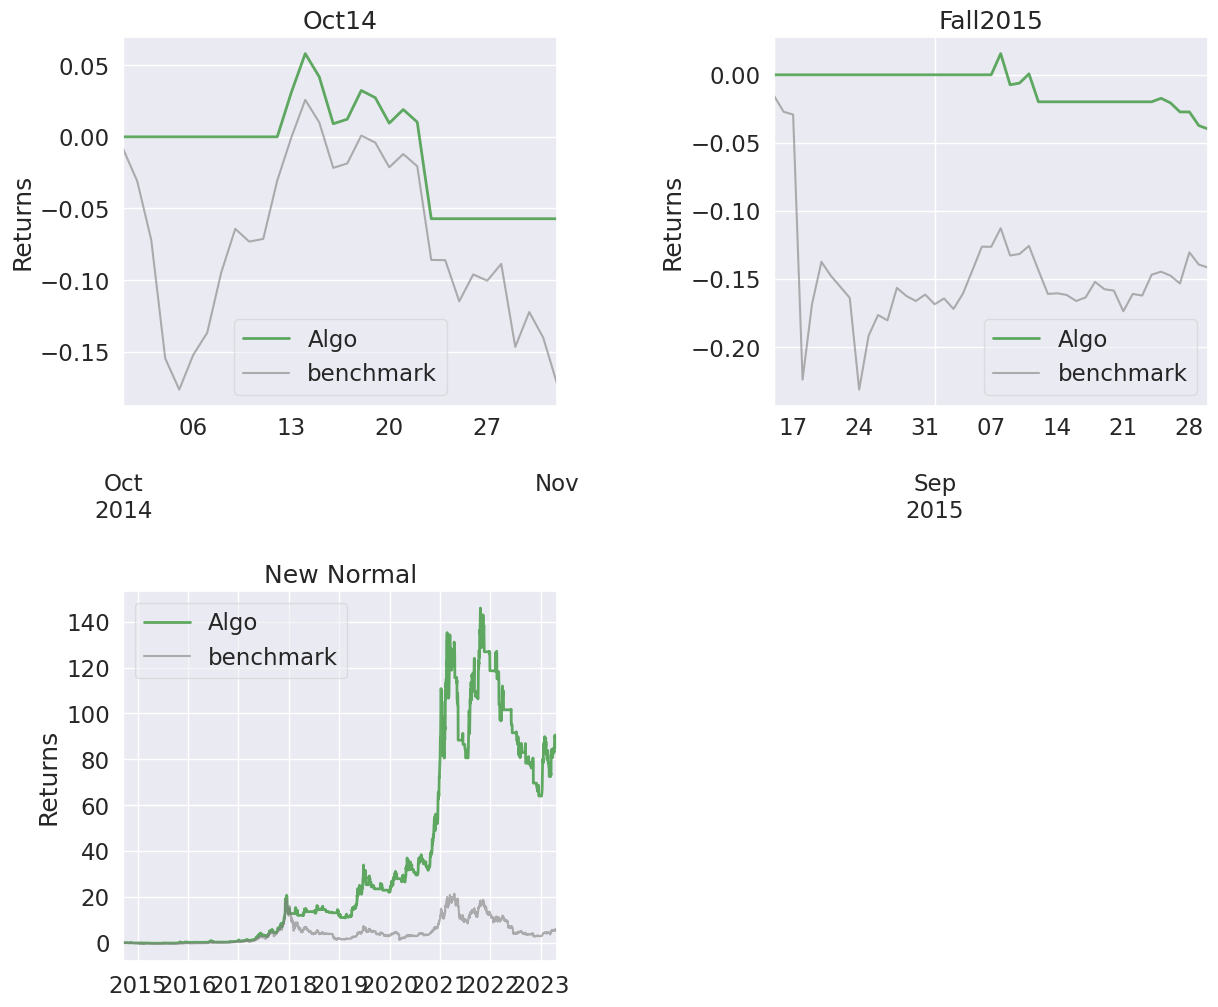

In [7]:
pf.create_full_tear_sheet(returns=smabt.results['strategy'], benchmark_rets=smabt.results['return'])

In [8]:
# Optimizing parameters
opt_results = smabt.optimize_parameters((21, 200, 4), (21, 200, 4))
print(f'{smabt.strategy} Optimal Parameters: wind1={opt_results[0][0]}, wind2={opt_results[0][1]}')
print(f'Max Performance with optimal parameters: {opt_results[1]*100}%\n')
print(f'Asset Performance:', smabt.results['creturns'][-1]*100,"%")

EMA Optimal Parameters: wind1=73.0, wind2=21.0
Max Performance with optimal parameters: 24989.0%

Asset Performance: 6895.86430879958 %


In [9]:
smabt.window1

73

In [10]:
smabt.results

,price,return,EMA,position,strategy,trades,creturns,cstrategy,new_position,entry_date,holding_period,over_year,tax,strategy_after_tax,cstrategy_after_tax
Date,,,,,,,,,,,,,,,
2014-09-19,394.795990,-0.072402,424.952383,0,-0.000000,0.0,0.930157,1.000000,0.0,NaT,NaT,False,-0.000000,0.000000,1.000000
2014-09-20,408.903992,0.035111,420.773920,0,0.000000,0.0,0.963396,1.000000,0.0,NaT,NaT,False,0.000000,0.000000,1.000000
2014-09-21,398.821014,-0.024968,416.139510,0,-0.000000,0.0,0.939640,1.000000,0.0,NaT,NaT,False,-0.000000,0.000000,1.000000
2014-09-22,402.152008,0.008317,413.645710,0,0.000000,0.0,0.947488,1.000000,0.0,NaT,NaT,False,0.000000,0.000000,1.000000
2014-09-23,435.790985,0.080333,417.075194,1,0.000000,1.0,1.026743,1.000000,1.0,2014-09-23,0 days,False,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,28422.701172,0.004058,26394.714404,1,0.004058,0.0,66.965180,242.670526,0.0,2023-03-12,45 days,False,0.001217,0.002841,46.720978
2023-04-27,29473.787109,0.036313,26477.932585,1,0.036313,0.0,69.441586,251.644606,0.0,2023-03-12,46 days,False,0.010894,0.025419,47.923810
2023-04-28,29340.261719,-0.004541,26555.292832,1,-0.004541,0.0,69.126995,250.504577,0.0,2023-03-12,47 days,False,-0.001362,-0.003178,47.771730


Start date,2014-09-19
End date,2023-04-30
Total months,149
,Backtest
Annual return,41.058%
Cumulative returns,7229.8%
Annual volatility,44.241%
Sharpe ratio,1.00
Calmar ratio,0.63
Stability,0.95
Max drawdown,-65.154%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,65.15,2017-12-16,2019-02-24,2019-06-26,398
1,47.19,2017-09-01,2017-09-24,2017-11-03,46
2,41.69,2021-11-08,2022-11-08,NaT,NaN
3,41.59,2019-06-26,2019-11-08,2020-08-17,299
4,35.09,2017-01-04,2017-01-14,2017-05-05,88


Stress Events,mean,min,max
Oct14,-0.17%,-6.68%,3.09%
Fall2015,0.00%,-0.00%,-0.00%
New Normal,0.18%,-20.75%,22.51%


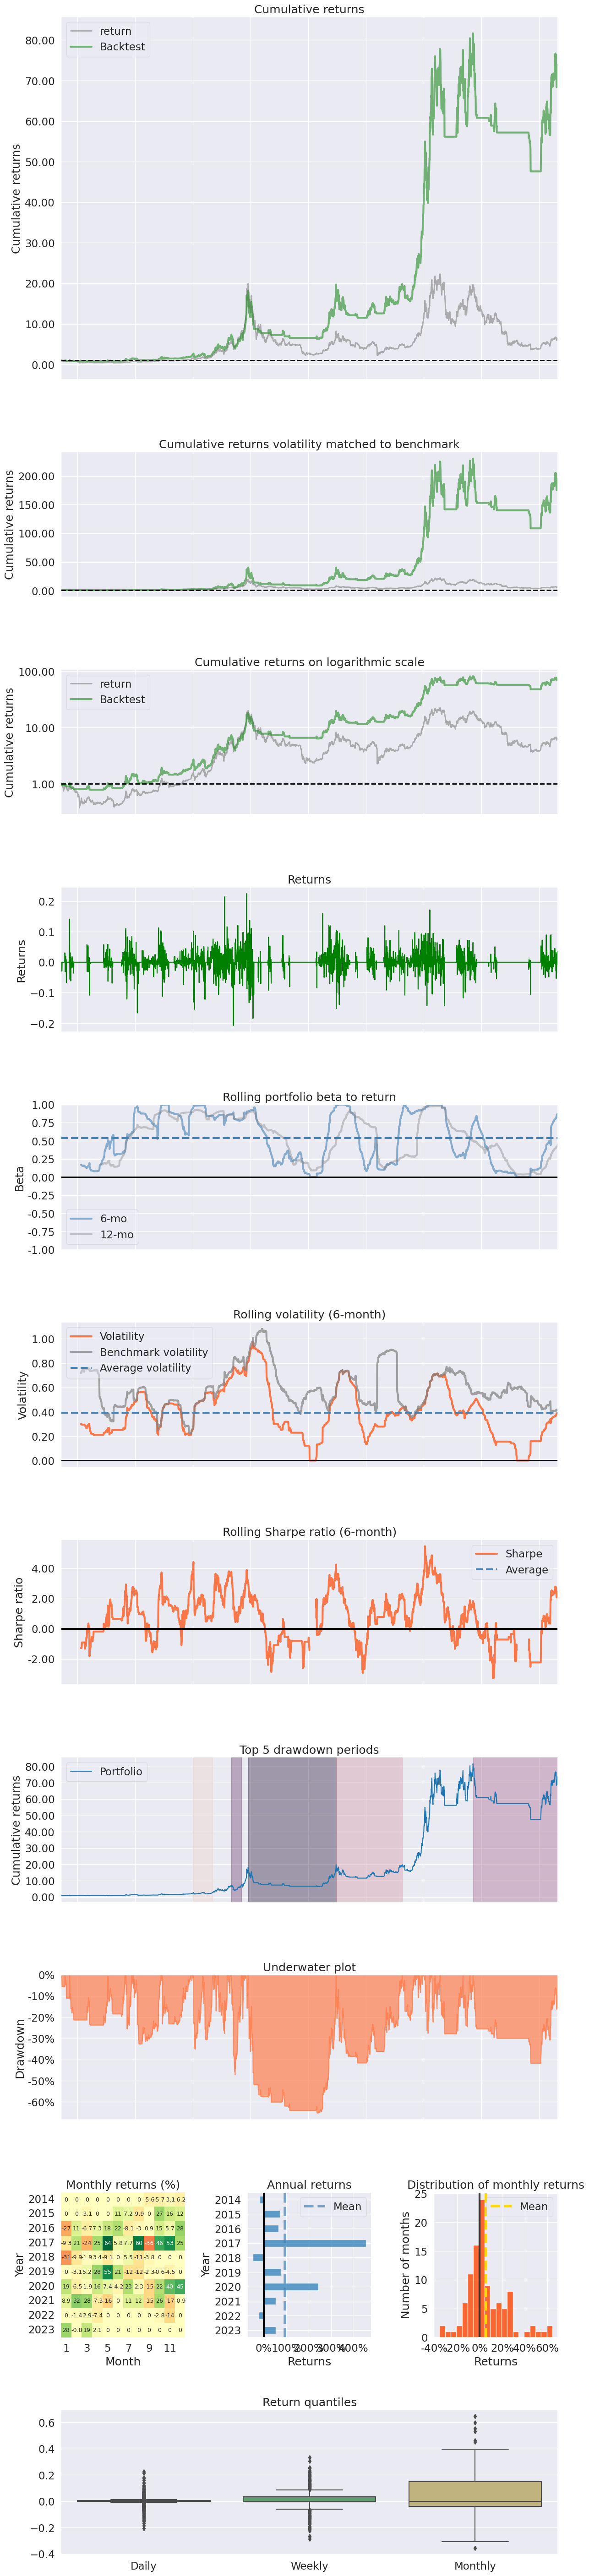

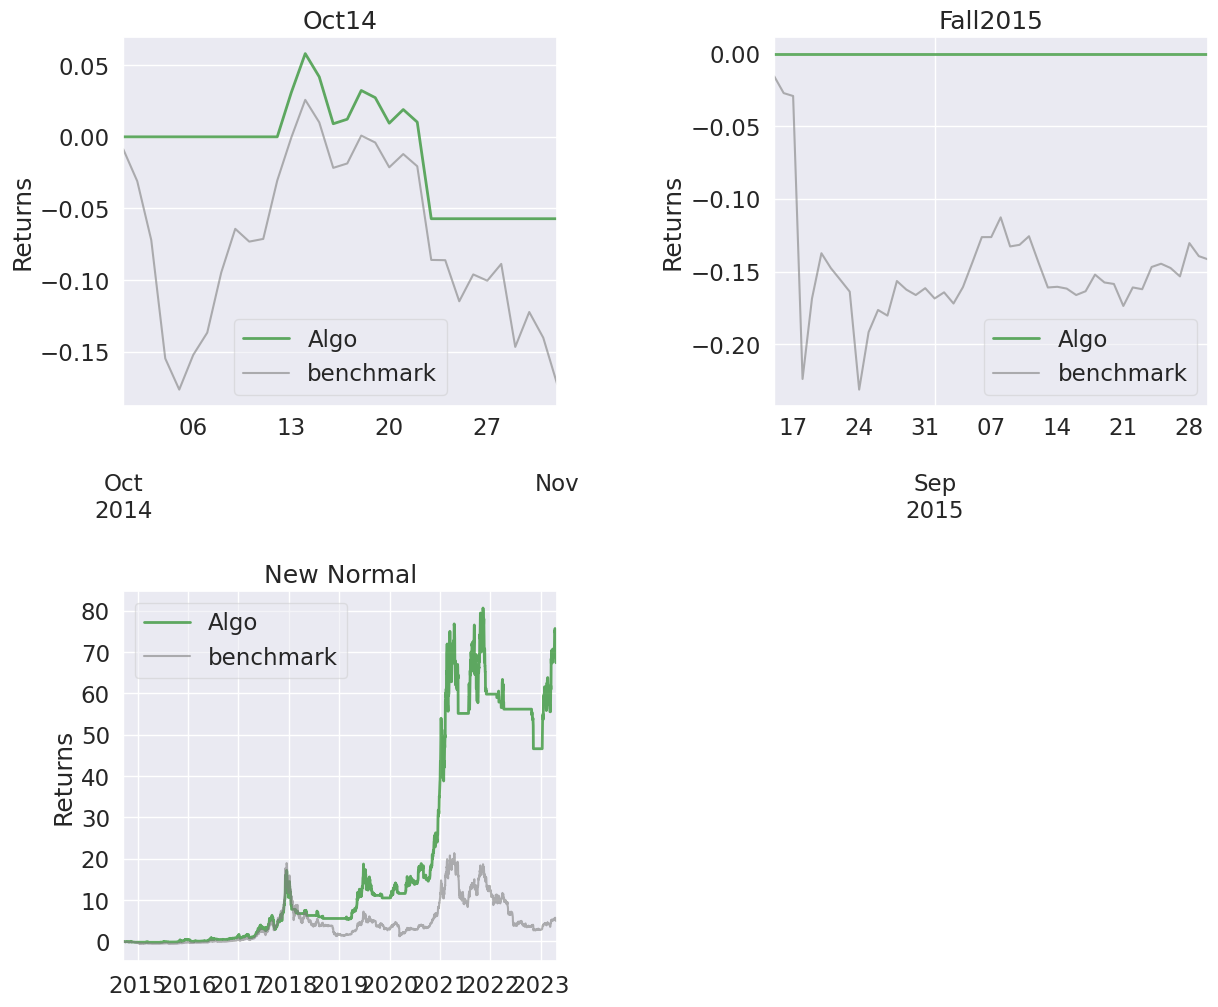

In [11]:
pf.create_full_tear_sheet(returns=smabt.results['strategy'], benchmark_rets=smabt.results['return'])